# Overview

This notebook is used to experiment with various modeling techniques.

# Setup

In [1]:
# Import libraries
import json
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

In [2]:
# Load data
with open('../../data/processed/dtypes.json') as in_file:
    non_date_dtypes = json.load(in_file)

with open('../../data/processed/date_types.json') as in_file:
    date_dtypes = json.load(in_file)

date_cols = list(date_dtypes)
print(non_date_dtypes)
print(date_cols)

{'Random_ID': 'int64', 'DaysSinceLastRegistration': 'int64', 'DaysSinceFirstRegistration': 'int64', 'PastRegistrations': 'int64', 'DaysSinceLast2UnitsRBCRegistration': 'float64', 'DaysSinceLastPlasmaApheresisRegistration': 'float64', 'DaysSinceLastPlateletApheresisRegistration': 'float64', 'DaysSinceLastPlateletsandConcurrentPlasmaRegistration': 'float64', 'DaysSinceLastRBCwithPlasmaRegistration': 'float64', 'DaysSinceLastRBCwithPlateletsRegistration': 'float64', 'DaysSinceLastRBCwithPlateletsandPlasmaRegistration': 'float64', 'DaysSinceLastSingleUnitRecoveryRegistration': 'float64', 'DaysSinceLastWholeBloodRegistration': 'float64', 'DaysEligible': 'float64', 'PercentOfTargetPeriodEligible': 'float64', 'LastDonationLocation_Center': 'float64', 'LastDonationType_2UnitsRBC': 'float64', 'LastDonationType_PlasmaApheresis': 'float64', 'LastDonationType_PlateletApheresis': 'float64', 'LastDonationType_PlateletsandConcurrentPlasma': 'float64', 'LastDonationType_RBCwithPlasma': 'float64', 'Las

In [3]:
# Read data, specifically parsing date columns as dates
data = pd.read_csv('../../data/processed/data.csv', dtype=non_date_dtypes, parse_dates=date_cols)

In [4]:
data.head()

,Random_ID,DaysSinceLastRegistration,DaysSinceFirstRegistration,PastRegistrations,DaysSinceLast2UnitsRBCRegistration,DaysSinceLastPlasmaApheresisRegistration,DaysSinceLastPlateletApheresisRegistration,DaysSinceLastPlateletsandConcurrentPlasmaRegistration,DaysSinceLastRBCwithPlasmaRegistration,DaysSinceLastRBCwithPlateletsRegistration,...,TargetRBCwithPlasmaRegistrations,TargetRBCwithPlateletsRegistrations,TargetRBCwithPlateletsandPlasmaRegistrations,TargetSingleUnitRecoveryRegistrations,TargetWholeBloodRegistrations,TargetPlateletRegistrations,DonationsPerDay,CutoffDate,RegisteredInTargetPeriod,RegisteredForPlateletsInTargetPeriod
0,54260,32,32,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.031250,2016-03-31 23:59:59,0,0
1,54261,308,308,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003247,2016-03-31 23:59:59,0,0
2,54273,165,165,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.006061,2016-03-31 23:59:59,1,0
3,54330,100,301,2,301.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.006645,2016-03-31 23:59:59,0,0
4,54354,200,200,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.005000,2016-03-31 23:59:59,1,0


In [5]:
# Choose target variable
target_name = 'RegisteredInTargetPeriod'
# target_name = 'RegisteredForPlateletsInTargetPeriod'

In [6]:
data.loc[:, ['DaysSinceLastRegistration', 'DaysSinceFirstRegistration',
       'PastRegistrations', 'DaysEligible', 'LastDonationLocation_Center',
       'LastDonationType_WholeBlood', 'ModalDonationLocation_Center', 'DonationsPerDay', 'PercentOfTargetPeriodEligible', 'RegisteredInTargetPeriod']].groupby('RegisteredInTargetPeriod').mean()

,DaysSinceLastRegistration,DaysSinceFirstRegistration,PastRegistrations,DaysEligible,LastDonationLocation_Center,LastDonationType_WholeBlood,ModalDonationLocation_Center,DonationsPerDay,PercentOfTargetPeriodEligible
RegisteredInTargetPeriod,,,,,,,,,
0,208.054309,273.454914,1.477571,186.332102,0.147616,0.904027,0.144758,0.008189,0.932856
1,119.308011,288.568081,2.985945,102.554239,0.344827,0.839928,0.340194,0.012233,0.899043


# Train model using RFT features + some more

In [7]:
# Construct feature set (remove date/time columns)
# feature_names =list(data.columns).remove(['Random_ID', 'CutoffDate', 'TargetPeriodEndDate'])
# feature_names = ['DaysSinceLastRegistration', 'PastRegistrations', 'DaysSinceFirstRegistration', 'ModalDonationLocation_Center', 'PercentOfTargetPeriodEligible']
feature_names = ['DaysSinceLastRegistration', 'DaysSinceFirstRegistration',
       'PastRegistrations', 'LastDonationLocation_Center',
       'LastDonationType_WholeBlood', 'ModalDonationLocation_Center', 'DonationsPerDay']

# data = data[data['DaysSinceLastRegistration'] <= 180]  # Must have donated within 180 days of each cutoff

X = data.loc[:, feature_names]
y = data.loc[:, target_name]

In [8]:
# Split data randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=503)
print(f"Training feature set size: {X_train.shape}")
print(f"Training response set size: {y_train.shape}")
print(f"Test feature set size: {X_test.shape}")
print(f"Test response set size: {y_test.shape}")

Training feature set size: (1289108, 7)
Training response set size: (1289108,)
Test feature set size: (322277, 7)
Test response set size: (322277,)


In [9]:
# Train model on training data
clf_logreg = LogisticRegression(penalty='none', random_state=503).fit(X_train, y_train)

In [10]:
# Test on test data
clf_logreg.score(X_test, y_test)

0.9038808230187075

In [11]:
y_pred = clf_logreg.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.91      1.00      0.95    290449
           1       0.63      0.06      0.12     31828

    accuracy                           0.90    322277
   macro avg       0.77      0.53      0.53    322277
weighted avg       0.88      0.90      0.87    322277



In [13]:
# See breakdown of predicted classes
pd.DataFrame(clf_logreg.predict(X_test))[0].value_counts()

0    319102
1      3175
Name: 0, dtype: int64

Unfortunately, it looks like the imbalance in our dataset causes a major problem. It can get an accurate model just by predicting 0 most of the time.

# Form quantiles and calculate aggregate percentages

In [14]:
pred_probs = clf_logreg.predict_proba(X_test)[:, 1]  # Prediction of positive target
pred_probs[:10]

array([0.07905213, 0.04686036, 0.06332301, 0.07443988, 0.08617288,
       0.0383344 , 0.05718051, 0.14242922, 0.09053753, 0.08847687])

In [15]:
probs_vs_actual = pd.DataFrame(
    np.stack((y_test, pred_probs), axis=1),
    columns=[target_name, 'PredictedProbabilityOfRegistration']
)
probs_vs_actual

,RegisteredInTargetPeriod,PredictedProbabilityOfRegistration
0,0.0,0.079052
1,0.0,0.046860
2,0.0,0.063323
3,0.0,0.074440
4,0.0,0.086173
...,...,...
322272,0.0,0.017160
322273,0.0,0.083923
322274,0.0,0.168019
322275,0.0,0.076986


In [16]:
# Sort in place
probs_vs_actual.sort_values(by='PredictedProbabilityOfRegistration', ascending=False, inplace=True)
probs_vs_actual

,RegisteredInTargetPeriod,PredictedProbabilityOfRegistration
38683,1.0,0.999647
300679,1.0,0.998631
168928,1.0,0.998562
290309,1.0,0.998222
294165,1.0,0.997804
...,...,...
282658,0.0,0.008986
309768,0.0,0.008986
50864,0.0,0.008923
303641,0.0,0.008923


In [17]:
# Assign quantiles
probs_vs_actual['Quantile'] = pd.qcut(-probs_vs_actual['PredictedProbabilityOfRegistration'], 10, labels=False)
probs_vs_actual

,RegisteredInTargetPeriod,PredictedProbabilityOfRegistration,Quantile
38683,1.0,0.999647,0
300679,1.0,0.998631,0
168928,1.0,0.998562,0
290309,1.0,0.998222,0
294165,1.0,0.997804,0
...,...,...,...
282658,0.0,0.008986,9
309768,0.0,0.008986,9
50864,0.0,0.008923,9
303641,0.0,0.008923,9


In [18]:
# Calculate stats for each quantile: total actual registrations, total donors, and mean predicted probability
quantile_stats = probs_vs_actual.groupby('Quantile').agg({target_name: ['sum', 'count'], 'PredictedProbabilityOfRegistration': 'mean'})
quantile_stats

RegisteredInTargetPeriod        PredictedProbabilityOfRegistration
                              sum  count                               mean
Quantile                                                                   
0                         10684.0  32229                           0.309963
1                          5067.0  32228                           0.151772
2                          3986.0  32772                           0.113429
3                          2921.0  32206                           0.095018
4                          2176.0  31732                           0.084061
5                          1916.0  32301                           0.072541
6                          1699.0  32150                           0.060494
7                          1340.0  32382                           0.047882
8                          1261.0  32153                           0.034341
9                           778.0  32124                           0.018943

In [19]:
# Rename columns
quantile_stats.columns = ['ActualRegistered', 'TotalInQuantile', 'MeanPredictedProbability']
quantile_stats

,ActualRegistered,TotalInQuantile,MeanPredictedProbability
Quantile,,,
0,10684.0,32229,0.309963
1,5067.0,32228,0.151772
2,3986.0,32772,0.113429
3,2921.0,32206,0.095018
4,2176.0,31732,0.084061
5,1916.0,32301,0.072541
6,1699.0,32150,0.060494
7,1340.0,32382,0.047882
8,1261.0,32153,0.034341


In [20]:
# Just get the two variables we care about
quantile_stats['PercentActualRegistered'] = quantile_stats['ActualRegistered'] / quantile_stats['TotalInQuantile']
quantile_stats.reset_index(inplace=True)
quantile_stats.drop(['ActualRegistered', 'TotalInQuantile'], axis=1, inplace=True)
quantile_stats

,Quantile,MeanPredictedProbability,PercentActualRegistered
0,0,0.309963,0.331503
1,1,0.151772,0.157224
2,2,0.113429,0.121628
3,3,0.095018,0.090697
4,4,0.084061,0.068574
5,5,0.072541,0.059317
6,6,0.060494,0.052846
7,7,0.047882,0.041381
8,8,0.034341,0.039219
9,9,0.018943,0.024219


In [21]:
# Melt so we can plot mean predicted probability and actual % registered together
melted_quantile_stats = pd.melt(quantile_stats, id_vars='Quantile', var_name='Measure', value_name='Value')
melted_quantile_stats

,Quantile,Measure,Value
0,0,MeanPredictedProbability,0.309963
1,1,MeanPredictedProbability,0.151772
2,2,MeanPredictedProbability,0.113429
3,3,MeanPredictedProbability,0.095018
4,4,MeanPredictedProbability,0.084061
5,5,MeanPredictedProbability,0.072541
6,6,MeanPredictedProbability,0.060494
7,7,MeanPredictedProbability,0.047882
8,8,MeanPredictedProbability,0.034341
9,9,MeanPredictedProbability,0.018943


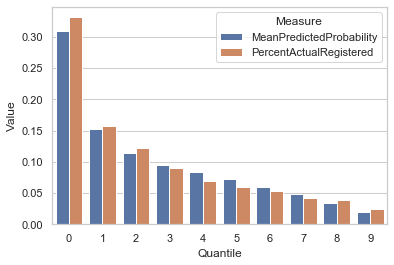

In [22]:
sb.set(style='whitegrid')
ax = sb.barplot(x='Quantile', y='Value', hue='Measure', data=melted_quantile_stats)
plt.savefig('../../reports/figures/quantile_plot.png')

In [23]:
y_pred = clf_logreg.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(289287, 1162, 29815, 2013)

In [24]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.91      1.00      0.95    290449
           1       0.63      0.06      0.12     31828

    accuracy                           0.90    322277
   macro avg       0.77      0.53      0.53    322277
weighted avg       0.88      0.90      0.87    322277



# Undersample negative target for balanced classes

In [25]:
data[target_name].value_counts()

0    1452082
1     159303
Name: RegisteredInTargetPeriod, dtype: int64

In [26]:
from sklearn.utils import resample

# Separate majority (negative) and minority (positive) targets
data_majority = data[data[target_name] == 0]
data_minority = data[data[target_name] == 1]

# Downsample the majority
data_majority_downsampled = resample(data_majority, replace=False, n_samples=int(np.ceil(data[target_name].value_counts()[1]*2)), random_state=503)

# Combine into a new dataset
data_downsampled = pd.concat([data_majority_downsampled, data_minority])

data_downsampled[target_name].value_counts()

0    318606
1    159303
Name: RegisteredInTargetPeriod, dtype: int64

In [27]:
# Construct feature set (remove date/time columns)
# feature_names =list(data.columns).remove(['Random_ID', 'CutoffDate', 'TargetPeriodEndDate'])
# feature_names = ['DaysSinceLastRegistration', 'PastRegistrations', 'DaysSinceFirstRegistration', 'ModalDonationLocation_Center', 'PercentOfTargetPeriodEligible']

X = data_downsampled.loc[:, feature_names]
y = data_downsampled.loc[:, target_name]

# Split data randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=503)
print(f"Training feature set size: {X_train.shape}")
print(f"Training response set size: {y_train.shape}")
print(f"Test feature set size: {X_test.shape}")
print(f"Test response set size: {y_test.shape}")

Training feature set size: (382327, 7)
Training response set size: (382327,)
Test feature set size: (95582, 7)
Test response set size: (95582,)


In [28]:
# Train model on downsampled training data
clf_logreg = LogisticRegression(penalty='none', random_state=503).fit(X_train, y_train)

In [29]:
# Test on test data
y_pred = clf_logreg.predict(X_test)
roc_auc_score(y_test, y_pred)

0.6249881841882121

In [30]:
# See breakdown of predicted classes
pd.DataFrame(y_pred)[0].value_counts()

0    80477
1    15105
Name: 0, dtype: int64

In [31]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(58966, 4762, 21511, 10343)

In [32]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.73      0.93      0.82     63728
           1       0.68      0.32      0.44     31854

    accuracy                           0.73     95582
   macro avg       0.71      0.62      0.63     95582
weighted avg       0.72      0.73      0.69     95582



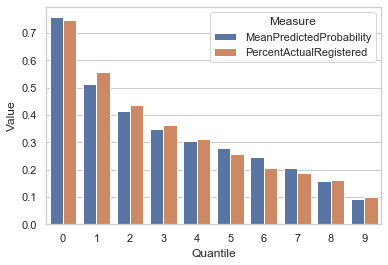

In [33]:
# Do quantile plot for downsampled data
pred_probs = clf_logreg.predict_proba(X_test)[:, 1]  # Prediction of positive target

probs_vs_actual = pd.DataFrame(
    np.stack((y_test, pred_probs), axis=1),
    columns=[target_name, 'PredictedProbabilityOfRegistration']
)

# Sort in place
probs_vs_actual.sort_values(by='PredictedProbabilityOfRegistration', ascending=False, inplace=True)

# Assign quantiles
probs_vs_actual['Quantile'] = pd.qcut(-probs_vs_actual['PredictedProbabilityOfRegistration'], 10, labels=False)

# Calculate stats for each quantile: total actual registrations, total donors, and mean predicted probability
quantile_stats = probs_vs_actual.groupby('Quantile').agg({target_name: ['sum', 'count'], 'PredictedProbabilityOfRegistration': 'mean'})

# Rename columns
quantile_stats.columns = ['ActualRegistered', 'TotalInQuantile', 'MeanPredictedProbability']

# Just get the two variables we care about
quantile_stats['PercentActualRegistered'] = quantile_stats['ActualRegistered'] / quantile_stats['TotalInQuantile']
quantile_stats.reset_index(inplace=True)
quantile_stats.drop(['ActualRegistered', 'TotalInQuantile'], axis=1, inplace=True)

# Melt so we can plot mean predicted probability and actual % registered together
melted_quantile_stats = pd.melt(quantile_stats, id_vars='Quantile', var_name='Measure', value_name='Value')

sb.set(style='whitegrid')
ax = sb.barplot(x='Quantile', y='Value', hue='Measure', data=melted_quantile_stats)